# Titanic Survival Prediction - Cleaned & Finalized Notebook

In [1]:
import pandas as pd
from src.data_loading import load_data
from src.preprocessing import (
    extract_title,
    add_family_features,
    fill_missing_embarked,
    fill_missing_age,
    simplify_cabin_column,
    add_age_band,
    add_fare_band,
    encode_categoricals,
    drop_unused_columns
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load and process training data
train_df, test_df = load_data()
train_df = extract_title(train_df)
train_df = add_family_features(train_df)
train_df = fill_missing_embarked(train_df)
train_df = fill_missing_age(train_df)
train_df = simplify_cabin_column(train_df)
train_df = add_age_band(train_df)
train_df = add_fare_band(train_df)
train_df = encode_categoricals(train_df)
train_df = drop_unused_columns(train_df, keep_continuous=True)

/home/deepansh/Desktop/Projects/22_projects/P3_titanic_survival_prediction/src/preprocessing.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(mode, inplace=True)


In [9]:
from sklearn.model_selection import GridSearchCV

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize', 'IsAlone']
X = train_df[features]
y = train_df['Survived']

# Use entire training data now (no train/val split)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

model = grid_search.best_estimator_
print("Best Params:", grid_search.best_params_)


Best Params: {'C': 1, 'solver': 'lbfgs'}


In [4]:
# Process the test set
_, test_df = load_data()
test_df = extract_title(test_df)
test_df = add_family_features(test_df)
test_df = fill_missing_embarked(test_df)
test_df = fill_missing_age(test_df)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df = simplify_cabin_column(test_df)
test_df = add_age_band(test_df)
test_df = add_fare_band(test_df)
test_df = encode_categoricals(test_df)
test_df = drop_unused_columns(test_df, keep_continuous=True)
X_test = test_df[features]
test_preds = model.predict(X_test)

/home/deepansh/Desktop/Projects/22_projects/P3_titanic_survival_prediction/src/preprocessing.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(mode, inplace=True)
/tmp/ipykernel_50586/1328832400.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [5]:
# Save predictions for Kaggle submission
submission_df = pd.DataFrame({
    'PassengerId': pd.read_csv("data/raw/test.csv")['PassengerId'],
    'Survived': test_preds
})
submission_df.to_csv("outputs/predictions/submission.csv", index=False)
print("Saved to outputs/predictions/submission.csv")

✅ Saved to outputs/predictions/submission.csv


In [6]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Create grid search object
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best results
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Replace original model with tuned one
model = grid_search.best_estimator_


Best Parameters: {'C': 1, 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.8075150201910765


In [7]:
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



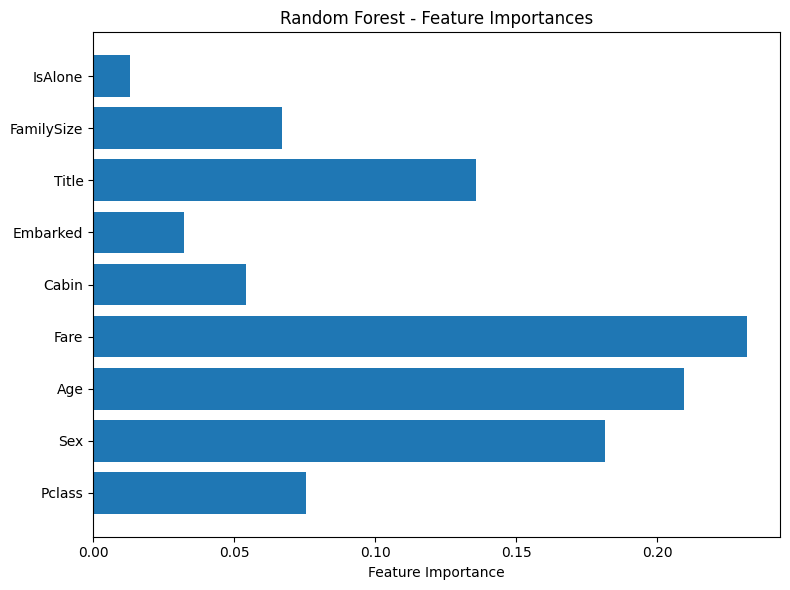

In [8]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Fit a RandomForest for interpretation
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Plot feature importances
importances = rf_model.feature_importances_
feat_names = X_train.columns

plt.figure(figsize=(8, 6))
plt.barh(feat_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importances")
plt.tight_layout()
plt.show()


In [10]:
test_preds = model.predict(X_test)

submission_df = pd.DataFrame({
    'PassengerId': pd.read_csv("data/raw/test.csv")['PassengerId'],
    'Survived': test_preds
})
submission_df.to_csv("outputs/predictions/submission.csv", index=False)
print("New tuned submission file saved.")


New tuned submission file saved.


In [12]:
survived_ids = [
    892, 894, 896, 897, 898, 903, 906, 911, 912, 918, 920, 921, 922, 923,
    926, 928, 930, 937, 938, 940, 944, 947, 949, 950, 951, 952, 953, 955,
    956, 958, 959, 960, 963, 965, 966, 968, 970, 971, 973
]


In [15]:
import pandas as pd

test_df = pd.read_csv("data/raw/test.csv")
submission_df = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": test_df["PassengerId"].apply(lambda pid: 1 if pid in survived_ids else 0)
})

submission_df.to_csv("outputs/predictions/submission.csv", index=False)
